## Unsupervised ML

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### loading the data

In [34]:
df = pd.read_csv('../data/clean_final_df.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2
1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7
2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19
3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5
4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4


In [3]:
df.shape

(13351, 15)

In [4]:
df_train = pd.read_csv('../data/clean_train.csv')
df_train.head()

,Unnamed: 0,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,info_No info,day,month,year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,price
0,0,2,2,3.0,1,0,0,1,24,3,2019,22,20,1,10,2,3897.0
1,1,3,3,2.0,0,0,0,1,1,5,2019,5,50,13,15,7,7662.0
2,2,4,4,2.0,0,1,0,1,9,6,2019,9,25,4,25,19,13882.0
3,3,3,3,1.0,1,0,0,1,12,5,2019,18,5,23,30,5,6218.0
4,4,2,2,1.0,1,0,0,1,1,3,2019,16,50,21,35,4,13302.0


In [5]:
df_train.shape

(10681, 17)

In [6]:
df_raw = pd.read_excel('../data/Data_Train.xlsx')
df_raw.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
corr = df_train.corr()['price'].sort_values(ascending = False)
print(corr)

price                  1.000000
duration_hours         0.508929
airline_Jet Airways    0.416271
Source                 0.359290
Destination            0.359290
arrival_hour           0.024221
info_No info           0.022101
dep_hour               0.006770
Unnamed: 0            -0.009430
dep_minute            -0.024776
arrival_minute        -0.086548
month                 -0.103536
day                   -0.153610
airline_other         -0.168868
airline_IndiGo        -0.361001
Total_Stops           -0.514377
year                        NaN
Name: price, dtype: float64


### making the feature selection(initial)

In [7]:
### my plan is to drop Airline and Additional_info column for sure
### but for the other columns, I am gonna look at the variance_ratio from pca

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [35]:
scaler = StandardScaler()
pca = PCA()

In [36]:
scaled = scaler.fit_transform(df)
pca.fit_transform(scaled)

array([[-2.64695884, -0.0432872 ,  1.91688678, ...,  0.15502934,
         0.        , -0.        ],
       [-0.31864483, -0.49066153, -0.27728305, ..., -1.03561276,
         0.        ,  0.        ],
       [ 1.63218236,  0.48705558,  0.67141624, ...,  0.49110424,
         0.        , -0.        ],
       ...,
       [ 1.1292409 ,  0.84486856,  0.54598826, ..., -0.21059213,
         0.        , -0.        ],
       [ 1.49560628, -1.18033996,  0.49797066, ..., -0.82912282,
         0.        ,  0.        ],
       [ 1.41557993, -2.01016145, -1.68292193, ...,  0.23298164,
        -0.        , -0.        ]])

In [37]:
arr = np.array(pca.explained_variance_ratio_)

In [38]:
np.set_printoptions(suppress = True)
print(arr)

[0.22156169 0.13303047 0.09420335 0.08250265 0.07869145 0.07328332
 0.07058065 0.06533455 0.05637527 0.0487731  0.03366181 0.02997861
 0.01202307 0.         0.        ]


### applying the pca

In [ ]:
### from the above logic, I am dropping 2 columns that were categorical and then one hot encoded
### as well using the pca for the reduction to 2 components

In [39]:
df.drop(['info_No info', 'year'], axis = 1, inplace = True)
df.head()

,Source,Destination,Total_Stops,airline_IndiGo,airline_Jet Airways,airline_other,day,month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours
0,2,2,3.0,1,0,0,24,3,22,20,1,10,2
1,3,3,2.0,0,0,0,1,5,5,50,13,15,7
2,4,4,2.0,0,1,0,9,6,9,25,4,25,19
3,3,3,1.0,1,0,0,12,5,18,5,23,30,5
4,2,2,1.0,1,0,0,1,3,16,50,21,35,4


In [40]:
df_scaled = scaler.fit_transform(df)

In [43]:
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_scaled)

### ------------------------Unsupervised ML---------------------------

In [52]:
from sklearn.metrics import silhouette_score

In [59]:
def plot_graphs(df_pca, y_labels) : 
    print(silhouette_score(df_pca, y_labels))
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(df_pca[:, 0], df_pca[:, 1], c = y_labels)
    plt.subplot(1, 2, 2)
    plt.scatter(df_pca[:, 0], df_pca[:, 1])
    plt.show()

### 1. Kmeans clustering

In [55]:
from sklearn.cluster import KMeans

In [47]:
wcss = []
for k in range(1, 12) : 
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

In [48]:
print(wcss)

[62566.017437888884, 29905.78476402097, 16367.349684891085, 12915.685091899612, 9931.721908532705, 8564.653993364134, 6970.011711000777, 5889.4527113950535, 5474.588126138246, 4623.667404435239, 4395.7795866990755]


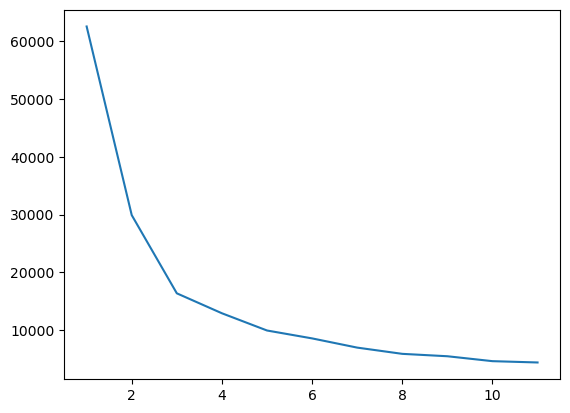

In [50]:
plt.plot(range(1, 12), wcss)

In [57]:
### taking n_clusters = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_labels_kmeans = kmeans.fit_predict(df_pca)

0.5034780782274063


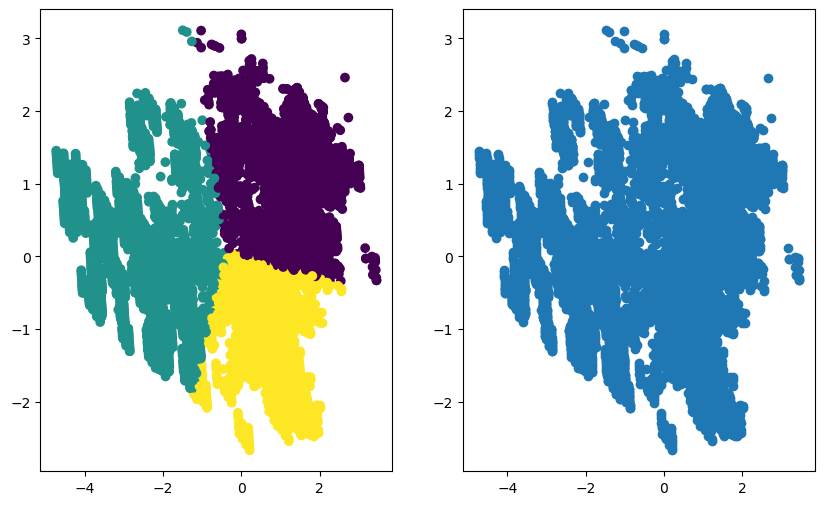

In [60]:
plot_graphs(df_pca, y_labels_kmeans)

### 2. DB Scan clustering

In [62]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [63]:
neigh = NearestNeighbors(n_neighbors = 5)
nbrs = neigh.fit(df_pca)
distances, indices = neigh.kneighbors(df_pca)
distances = np.sort(distances[:, 4])

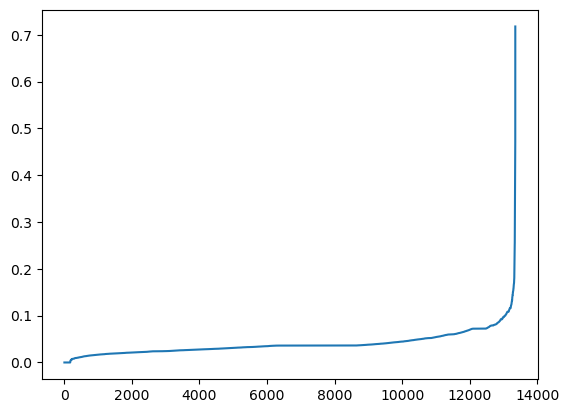

In [64]:
plt.plot(distances)

-0.3345198845303157


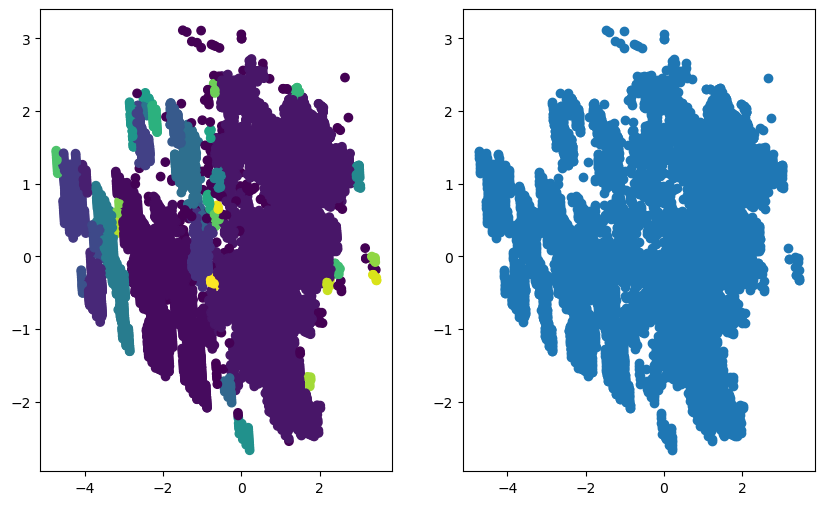

In [67]:
### taking eps = 0.095
db = DBSCAN(eps = 0.095)
y_labels_db = db.fit_predict(df_pca)
plot_graphs(df_pca, y_labels_db)

### 3. HM clustering

In [68]:
### for hm clustering I have to take only 2000 columns from the original dataset
### due to the lack of the resources

In [69]:
df_pca_hm = df_pca[:2000]
print(f"{df_pca.shape} :: {df_pca_hm.shape}")

(13351, 2) :: (2000, 2)


Text(0, 0.5, 'euclidian distance')

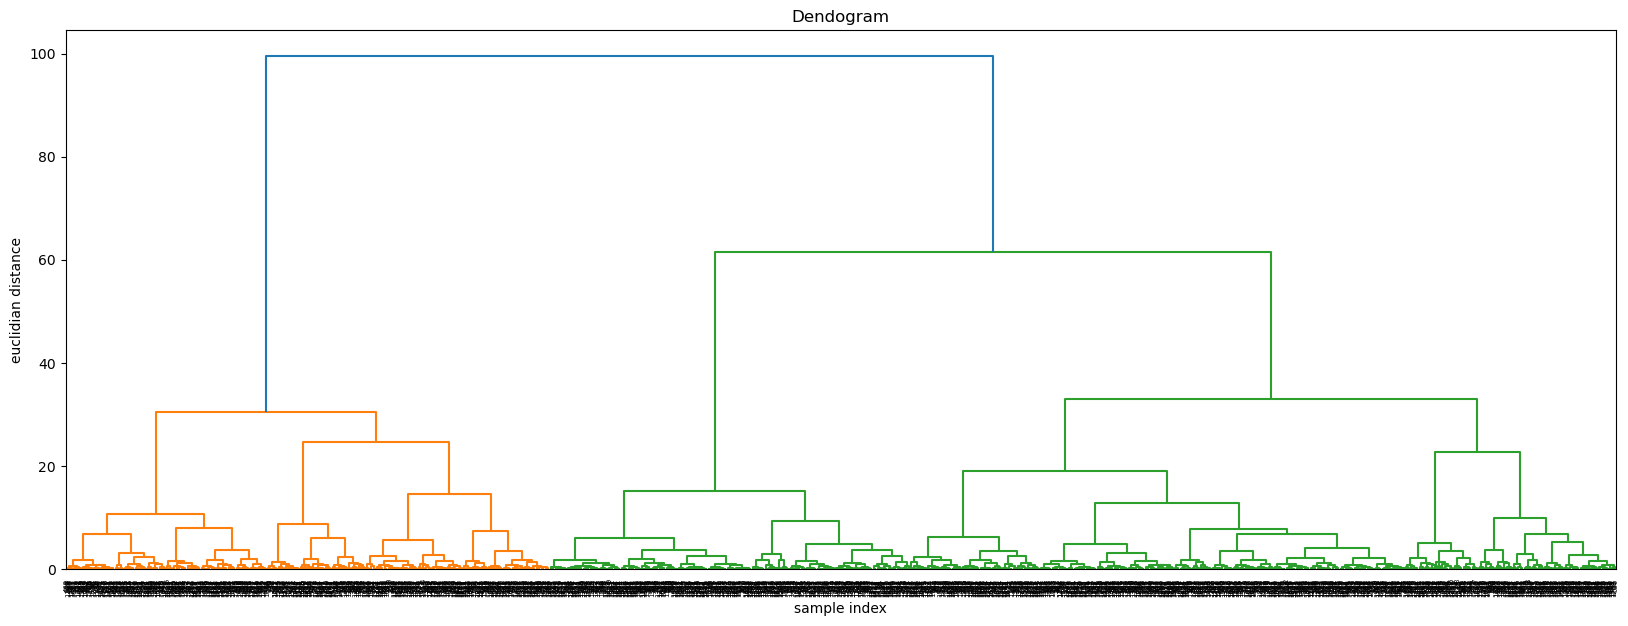

In [70]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendogram")
sc.dendrogram(sc.linkage(df_pca_hm, method = 'ward'))
plt.title('Dendogram')
plt.xlabel("sample index")
plt.ylabel("euclidian distance")

0.4703484162622101


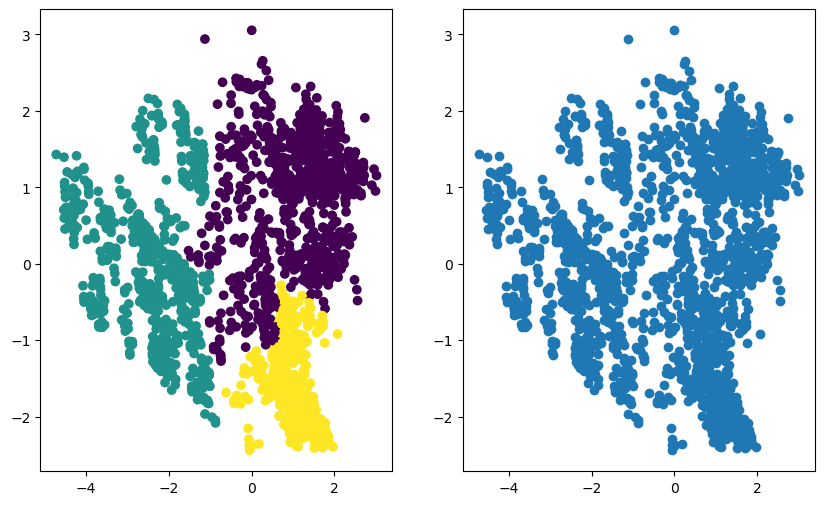

In [71]:
### n_clusters = 3
hm = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
y_labels_hm = hm.fit_predict(df_pca_hm)
plot_graphs(df_pca_hm, y_labels_hm)

### -----------------------Anomaly Detection--------------------